In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import time as time

import os
from IPython.display import display # Allows the use of display() for DataFrame

#pretty display for notebooks
%matplotlib inline

data = pd.read_csv("/content/drive/MyDrive/ASD.csv")
display(data.head(7))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,0,0,0,1,1,1,1,1,1,0,...,m,Hispanic,yes,yes,Austria,no,6,'12-16 years',Parent,NO
1,0,0,0,0,0,0,0,0,1,1,...,m,Black,no,no,Austria,no,2,'12-16 years',Relative,NO
2,0,0,0,0,0,0,0,0,1,1,...,f,?,no,no,AmericanSamoa,no,2,'12-16 years',?,NO
3,0,1,1,1,1,1,0,1,1,0,...,f,White-European,no,no,'United Kingdom',no,7,'12-16 years',Self,YES
4,1,1,1,1,1,1,1,0,0,0,...,f,?,no,no,Albania,no,7,'12-16 years',?,YES
5,1,0,0,0,0,1,0,0,1,0,...,f,?,no,no,Belgium,no,3,'12-16 years',?,NO
6,0,0,0,1,1,1,1,1,1,0,...,f,?,no,no,Afghanistan,no,6,'12-16 years',?,NO


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.shape

(1100, 21)

In [ ]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class'],
      dtype='object')

In [ ]:
# Number of records where individual's with ASD
n_asd_yes = len(data[data['Class'] == 'YES'])

#Number of records where individual's with no ASD
n_asd_no = len(data[data['Class'] == 'NO'])

# Total number of records
n_records = len(data.index)

#Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

print("Individuals diagonised with ASD: ",n_asd_yes)
print("Individuals not diagonised with ASD: ",n_asd_no)
print("Percentage of individuals diagonised with ASD: ", yes_percent)

Individuals diagonised with ASD:  393
Individuals not diagonised with ASD:  707
Percentage of individuals diagonised with ASD:  35.72727272727273


In [ ]:
asd_data = pd.read_csv('/content/drive/MyDrive/ASD.csv', na_values=['?'])
asd_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,0,0,0,1,1,1,1,1,1,0,...,m,Hispanic,yes,yes,Austria,no,6,'12-16 years',Parent,NO
1,0,0,0,0,0,0,0,0,1,1,...,m,Black,no,no,Austria,no,2,'12-16 years',Relative,NO
2,0,0,0,0,0,0,0,0,1,1,...,f,NaN,no,no,AmericanSamoa,no,2,'12-16 years',NaN,NO
3,0,1,1,1,1,1,0,1,1,0,...,f,White-European,no,no,'United Kingdom',no,7,'12-16 years',Self,YES
4,1,1,1,1,1,1,1,0,0,0,...,f,NaN,no,no,Albania,no,7,'12-16 years',NaN,YES


In [ ]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1094.000000,1100.000000
mean,0.699091,0.482727,0.551818,0.530000,0.587273,0.443636,0.477273,0.605455,0.412727,0.621818,22.073126,5.411818
std,0.458862,0.499929,0.497534,0.499326,0.492548,0.497039,0.499710,0.488975,0.492548,0.485154,16.879373,2.523492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,3.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,21.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,7.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         1100 non-null   int64 
 1   A2_Score         1100 non-null   int64 
 2   A3_Score         1100 non-null   int64 
 3   A4_Score         1100 non-null   int64 
 4   A5_Score         1100 non-null   int64 
 5   A6_Score         1100 non-null   int64 
 6   A7_Score         1100 non-null   int64 
 7   A8_Score         1100 non-null   int64 
 8   A9_Score         1100 non-null   int64 
 9   A10_Score        1100 non-null   int64 
 10  age              1100 non-null   object
 11  gender           1100 non-null   object
 12  ethnicity        1100 non-null   object
 13  jundice          1100 non-null   object
 14  austim           1100 non-null   object
 15  contry_of_res    1100 non-null   object
 16  used_app_before  1100 non-null   object
 17  result           1100 non-null   

In [ ]:
# Now we can see that missing values are randomly spread over the data set
asd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         1100 non-null   int64  
 1   A2_Score         1100 non-null   int64  
 2   A3_Score         1100 non-null   int64  
 3   A4_Score         1100 non-null   int64  
 4   A5_Score         1100 non-null   int64  
 5   A6_Score         1100 non-null   int64  
 6   A7_Score         1100 non-null   int64  
 7   A8_Score         1100 non-null   int64  
 8   A9_Score         1100 non-null   int64  
 9   A10_Score        1100 non-null   int64  
 10  age              1094 non-null   float64
 11  gender           1100 non-null   object 
 12  ethnicity        956 non-null    object 
 13  jundice          1100 non-null   object 
 14  austim           1100 non-null   object 
 15  contry_of_res    1100 non-null   object 
 16  used_app_before  1100 non-null   object 
 17  result        

In [ ]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull())
            |(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
2,0,0,0,0,0,0,0,0,1,1,...,f,NaN,no,no,AmericanSamoa,no,2,'12-16 years',NaN,NO
4,1,1,1,1,1,1,1,0,0,0,...,f,NaN,no,no,Albania,no,7,'12-16 years',NaN,YES
5,1,0,0,0,0,1,0,0,1,0,...,f,NaN,no,no,Belgium,no,3,'12-16 years',NaN,NO
6,0,0,0,1,1,1,1,1,1,0,...,f,NaN,no,no,Afghanistan,no,6,'12-16 years',NaN,NO
28,1,1,0,0,0,0,1,0,1,0,...,m,NaN,no,no,Afghanistan,no,4,'12-16 years',NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,1,1,0,0,0,0,1,0,0,0,...,f,NaN,yes,no,'Saudi Arabia',no,3,'4-11 years',NaN,NO
1052,0,1,1,0,1,1,0,1,0,1,...,m,NaN,yes,no,Jordan,no,6,'4-11 years',NaN,NO
1057,0,1,0,1,1,0,1,1,0,1,...,m,NaN,yes,no,Egypt,no,6,'4-11 years',NaN,NO
1059,0,1,1,1,1,1,1,1,0,1,...,m,NaN,yes,no,Egypt,no,8,'4-11 years',NaN,YES


In [ ]:
asd_raw = asd_data['Class']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'used_app_before','relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform

display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,used_app_before,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.029024,m,Hispanic,yes,yes,Austria,0.6,no,Parent,0,0,0,1,1,1,1,1,1,0
1,0.029024,m,Black,no,no,Austria,0.2,no,Relative,0,0,0,0,0,0,0,0,1,1
2,0.021108,f,NaN,no,no,AmericanSamoa,0.2,no,NaN,0,0,0,0,0,0,0,0,1,1
3,0.026385,f,White-European,no,no,'United Kingdom',0.7,no,Self,0,1,1,1,1,1,0,1,1,0
4,0.031662,f,NaN,no,no,Albania,0.7,no,NaN,1,1,1,1,1,1,1,0,0,0


In [ ]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding. ".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_Ukraine,contry_of_res_Uruguay,used_app_before_no,used_app_before_yes,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self,relation_self
0,0.029024,0.6,0,0,0,1,1,1,1,1,...,0,0,1,0,0,0,1,0,0,0
1,0.029024,0.2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.021108,0.2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.026385,0.7,0,1,1,1,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0.031662,0.7,1,1,1,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0


126 total features after one-hot encoding. 
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'", 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', "contry_of_res_'Costa Rica'", "contry_of_res_'Czech Republic'", "contry_of_res_'Hong Kong'", "contry_of_res_'Isle of Man'", "contry_of_res_'New Zealand'", "contry_of_res_'Saudi Arabia'", "contry_of_res_'Sierra Leone'", "contry_of_res_'South Africa'", "contry_of_res_'South Korea'", "contry_of_res_'Sri Lanka'", "contry_of_res_'U.S. Outlying Islands'", "contry_of_res_'United Arab Emirates'", "contry_of_res_'United Kingdom'", "contry_of_res_'United States'", "contry_of_res_'Viet Nam'", '

Text(0, 0.5, 'Frequency')

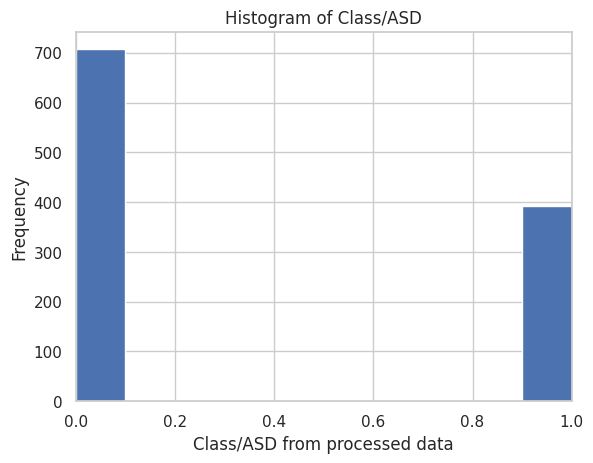

In [ ]:
plt.hist(asd_classes, bins=10)
# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 880 samples.
Testing set has 220 samples.


In [ ]:
y_test[y_test==np.inf]=np.nan
y_test.fillna(y_test.mean(), inplace=True)

In [ ]:
X_train[X_train==np.inf]=np.nan
X_train.fillna(X_train.mean(), inplace=True)

In [ ]:
X_test[y_test==np.inf]=np.nan
X_test.fillna(X_test.mean(), inplace=True)

**Modelling**

Decision Tree

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Using gini-index
def train_using_gini(X_train, y_train):
  clf_gini = DecisionTreeClassifier(criterion = "gini",max_features= None,max_depth=5, min_samples_leaf=1,min_samples_split= 2)
  clf_gini.fit(X_train, y_train)
  return clf_gini


In [ ]:
#Using Entropy
def train_using_entropy(X_train,y_train):
  #Creating a classifier object
  clf_entropy = DecisionTreeClassifier(criterion="entropy",max_features= None,max_depth=5,min_samples_leaf=1,min_samples_split=2)
  #Training
  clf_entropy.fit(X_train,y_train)
  return clf_entropy

In [ ]:
#Function to make predictions
def prediction(X_test,clf_object):
  y_pred=clf_object.predict(X_test)
  print("Predicted values:",y_pred)
  return y_pred

In [ ]:
#Function to calculate accuracy
def cal_accuracy(y_test,y_pred):
  print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))
  print("Accuracy:",accuracy_score(y_test,y_pred)*100)
  precision = precision_score(y_test, y_pred)
  print("Precision:", precision)
  recall = recall_score(y_test, y_pred)
  print("Recall:", recall)
  f1 = f1_score(y_test, y_pred)
  print("F1 Score:", f1)
  print("Report :",classification_report(y_test,y_pred))
  plt.figure(figsize=(6, 5))
  sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix - Decision Tree')
  plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np

# Define the hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  1.0


Results Using Gini Index:
Predicted values: [0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1]
Confusion Matrix:  [[148   0]
 [  0  72]]
Accuracy: 100.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        72

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



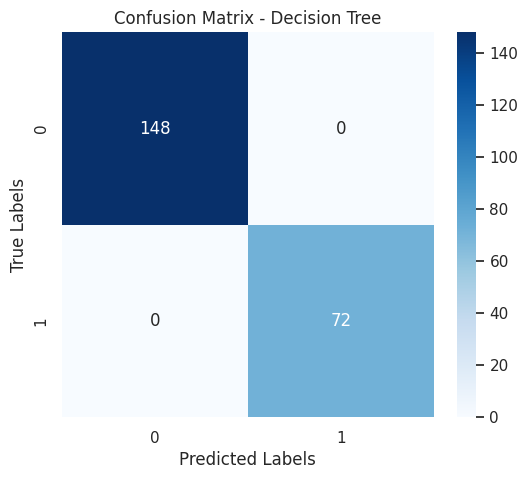

[Text(0.5, 0.75, 'x[1] <= 0.65\ngini = 0.463\nsamples = 880\nvalue = [559, 321]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 559\nvalue = [559, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 321\nvalue = [0, 321]')]

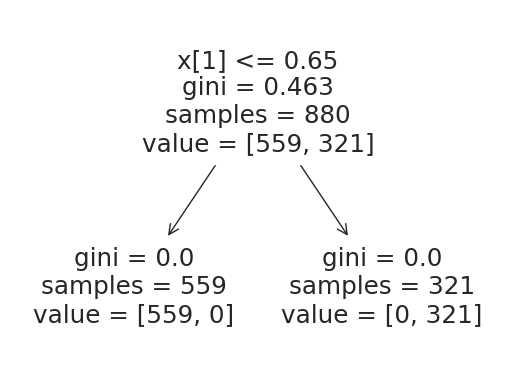

In [ ]:
#Gini Index
from sklearn import tree
clf_gini = train_using_gini(X_train, y_train)
print("Results Using Gini Index:")
# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
tree.plot_tree(clf_gini)

Predicted values: [0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1]
Confusion Matrix:  [[148   0]
 [  0  72]]
Accuracy: 100.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        72

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



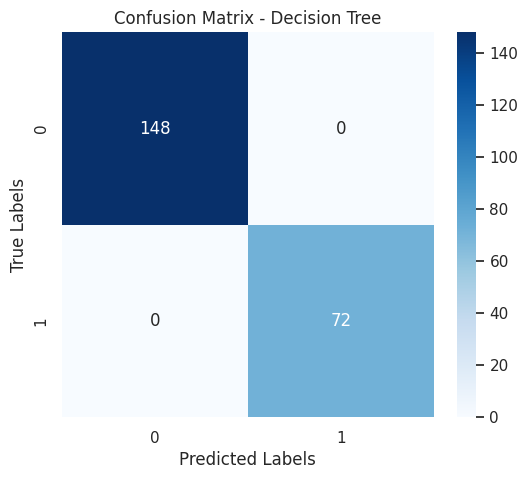

[Text(0.5, 0.75, 'x[1] <= 0.65\nentropy = 0.947\nsamples = 880\nvalue = [559, 321]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 559\nvalue = [559, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 321\nvalue = [0, 321]')]

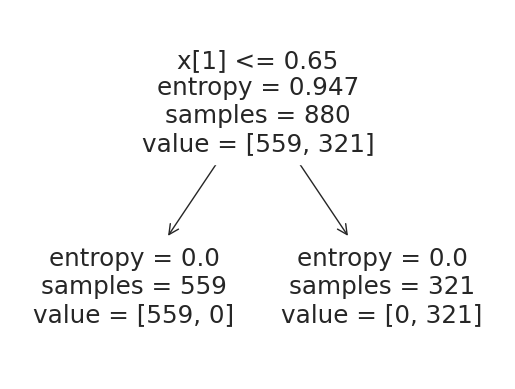

In [ ]:
#Analysing Metrics using entropy
clf_entropy = train_using_entropy(X_train,y_train)
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)
tree.plot_tree(clf_entropy)

In [ ]:
print(X_train.shape)

(880, 126)


In [ ]:
print(X_test.shape)

(220, 126)


In [ ]:
print(X_train.columns)

Index(['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
       'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
       ...
       'contry_of_res_Ukraine', 'contry_of_res_Uruguay', 'used_app_before_no',
       'used_app_before_yes', 'relation_'Health care professional'',
       'relation_Others', 'relation_Parent', 'relation_Relative',
       'relation_Self', 'relation_self'],
      dtype='object', length=126)


In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 126  # replace with the number of features in your data
string = '''1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 '''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 126)

# Make predictions using the trained model
predictions = clf_entropy.predict(input_data_reshaped)

print(predictions)

126
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 126  # replace with the number of features in your data
string = '''1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 '''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 126)

# Make predictions using the trained model
predictions = clf_gini.predict(input_data_reshaped)

print(predictions)

126
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(clf_gini, 'asd_dec_gini.pkl')

['asd_dec_gini.pkl']

In [ ]:
#saving the model
import joblib
joblib.dump(clf_entropy, 'asd_dec_entropy.pkl')

['asd_dec_entropy.pkl']

In [ ]:
asd_classes.replace([np.inf, -np.inf], np.nan, inplace=True)
features_final.replace([np.inf, -np.inf], np.nan, inplace=True)
asd_classes.fillna(asd_classes.mean(), inplace=True)
features_final.fillna(asd_classes.mean(), inplace=True)

**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
#ElasticNet
param_grid = [    {'penalty': ['elasticnet'],
     'solver': ['saga'],
     'l1_ratio': [0.1, 0.5, 0.9],
     'C': [0.1, 1, 10]}
]

# Perform grid search with crss-validation
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1,)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
logreg1 = LogisticRegression(penalty='elasticnet', C=1, solver='saga', l1_ratio=0.5)
logreg1.fit(X_train, y_train)
y_pred = logreg1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.metrics import fbeta_score,precision_score, recall_score,confusion_matrix
predictions_test = logreg1.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=2)

1.0

F1 Score: 1.0
Confusion matrix:
[[148   0]
 [  0  72]]


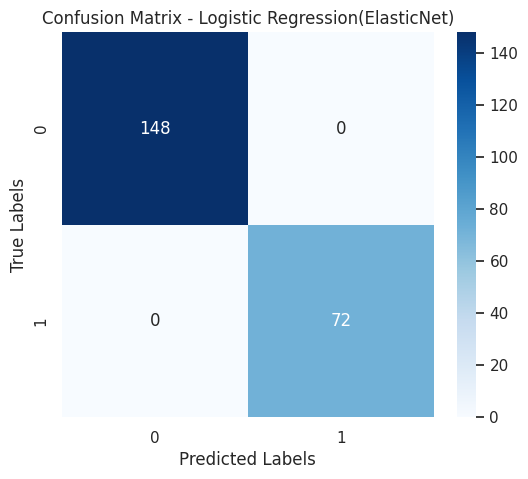

Accuracy: 1.000
Precision: 1.000
Recall: 1.000


In [ ]:
# Compute the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Compute the recall score
recall = recall_score(y_test, y_pred, average='weighted')
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Print the confusion matrix
print('Confusion matrix:')
print(confusion_mat)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression(ElasticNet)')
plt.show()

# Print the metrics
print('Accuracy: %.3f' % accuracy)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)


In [ ]:
y_pred=logreg1.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1]


In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 126  # replace with the number of features in your data
string = '''1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 '''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 126)

# Make predictions using the trained model
predictions = logreg1.predict(input_data_reshaped)

print(predictions)

126
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(logreg1, 'asd_log_elas.pkl')

['asd_log_elas.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
#l1
param_grid = [    {'penalty': ['l1'],
     'solver': ['liblinear','saga'],
     'l1_ratio': [0.1, 0.5, 0.9],
     'C': [0.1, 1, 10]}
]

# Perform grid search with crss-validation
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1,)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
{'C': 1, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [ ]:
logreg2 = LogisticRegression(penalty='l1', C=1, solver='liblinear', l1_ratio=0.1)
logreg2.fit(X_train, y_train)
y_pred = logreg2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [ ]:
y_pred=logreg2.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1]


In [ ]:
from sklearn.metrics import fbeta_score,precision_score, recall_score,confusion_matrix
predictions_test = logreg2.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=2)

1.0

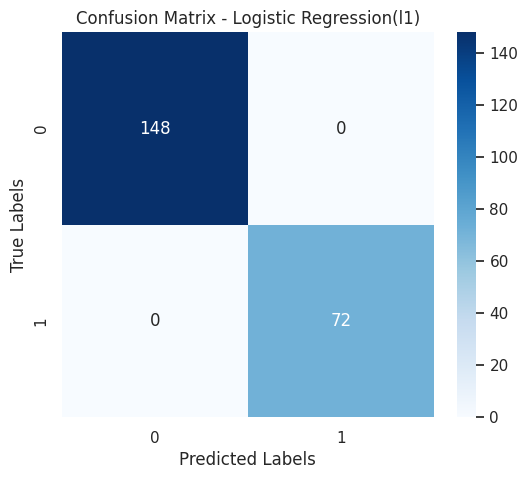

Confusion matrix:
[[148   0]
 [  0  72]]
F1 Score: 1.0
Accuracy: 1.000
Precision: 1.000
Recall: 1.000


In [ ]:
# Compute the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Compute the recall score
recall = recall_score(y_test, y_pred, average='weighted')
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression(l1)')
plt.show()

# Print the confusion matrix
print('Confusion matrix:')
print(confusion_mat)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Print the metrics
print('Accuracy: %.3f' % accuracy)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 126  # replace with the number of features in your data
string = '''1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 '''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 126)

# Make predictions using the trained model
predictions = logreg2.predict(input_data_reshaped)

print(predictions)

126
[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(logreg2, 'asd_log_l1.pkl')

['asd_log_l1.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
#l1
param_grid = [    {'penalty': ['l2'],
     'solver': ['lbfgs','saga','liblinear','newton-cg','newton-cholesky','sag'],
     'l1_ratio': [0.1, 0.5, 0.9],
     'C': [0.1, 1, 10]}
]

# Perform grid search with crss-validation
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1,)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'C': 10, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [ ]:
logreg3 = LogisticRegression(penalty='l2', C=10, solver='lbfgs', l1_ratio=0.1)
logreg3.fit(X_train, y_train)
y_pred = logreg3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [ ]:
y_pred=logreg3.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1]


In [ ]:
from sklearn.metrics import fbeta_score,precision_score, recall_score,confusion_matrix
predictions_test = logreg3.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=2)

1.0

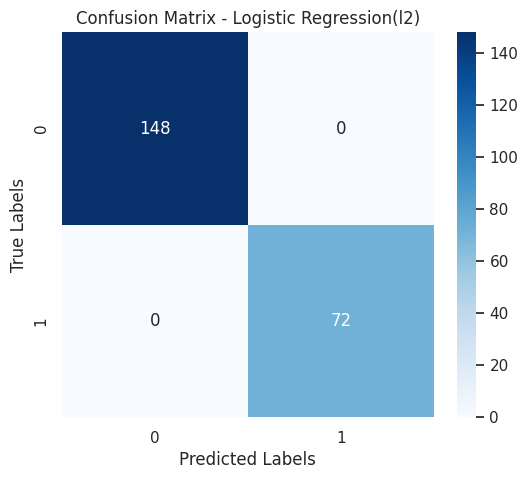

Confusion matrix:
[[148   0]
 [  0  72]]
F1 Score: 1.0
Accuracy: 1.000
Precision: 1.000
Recall: 1.000


In [ ]:
# Compute the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Compute the recall score
recall = recall_score(y_test, y_pred, average='weighted')
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression(l2)')
plt.show()

# Print the confusion matrix
print('Confusion matrix:')
print(confusion_mat)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Print the metrics
print('Accuracy: %.3f' % accuracy)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 126  # replace with the number of features in your data
string = '''1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 '''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 126)

# Make predictions using the trained model
predictions = logreg3.predict(input_data_reshaped)

print(predictions)

126
[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(logreg3, 'asd_log_l2.pkl')

['asd_log_l2.pkl']

**SVM**

{'C': 1, 'kernel': 'linear'}


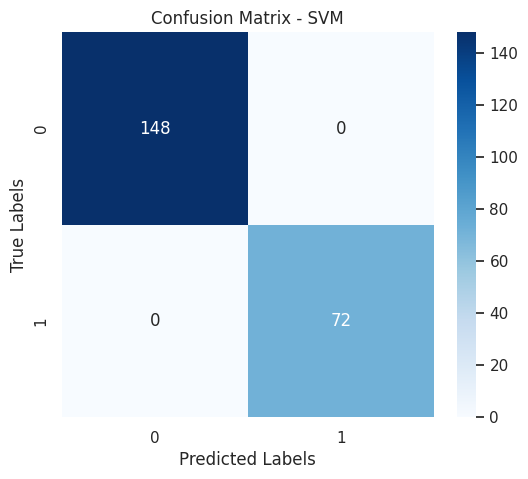

Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)
# Define the SVM model
svm_model = SVC()

# Define the hyperparameters to tune
parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear',  'sigmoid']

}
# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = svm_model, param_grid = parameters, scoring = scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)
print(grid_fit.best_params_)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
confusion_mat = confusion_matrix(y_test,best_predictions )
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()


# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

In [ ]:
y_pred=best_clf.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1]


In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 126  # replace with the number of features in your data
string = '''1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 '''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 126)

# Make predictions using the trained model
predictions = best_clf.predict(input_data_reshaped)

print(predictions)

126
[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(best_clf, 'asd_svm_lin.pkl')

['asd_svm_lin.pkl']

In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)



# Define the SVM model
svm_model = SVC()

# Define the hyperparameters to tune
parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': [ 'poly', 'rbf'],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto']
}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = svm_model, param_grid = parameters, scoring = scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)
print(grid_fit.best_params_)

# Get the estimator
best1_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best1_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
y_pred=best1_clf.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1]


In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 126  # replace with the number of features in your data
string = '''1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 '''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 126)

# Make predictions using the trained model
predictions = best1_clf.predict(input_data_reshaped)

print(predictions)

126
[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(best1_clf, 'asd_svm_polyrbf.pkl')

['asd_svm_polyrbf.pkl']

KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
import numpy as np

param_grid = {'n_neighbors' : np.arange(1,50)}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 3,scoring = 'accuracy')
grid.fit(X_train,y_train)
print('Best parameter: ', grid.best_params_)
print('Best score: ', grid.best_score_)


Best parameter:  {'n_neighbors': 36}
Best score:  0.9443090091554255


Confusion matrix:
[[142   6]
 [  2  70]]


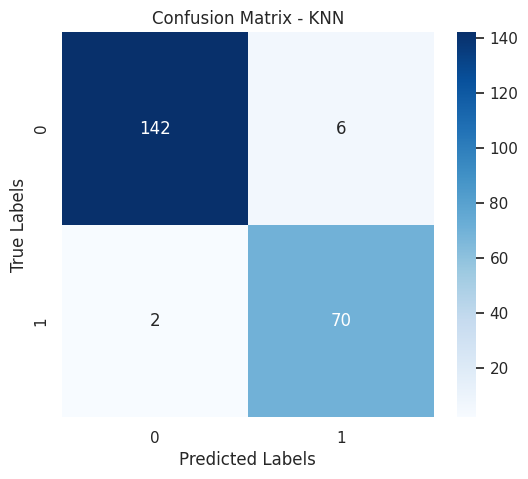

Accuracy: 0.964
Precision: 0.965
Recall: 0.964
F1 Score: 0.9459459459459458


In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=36)
knn1.fit(X_train,y_train)
y_pred = knn1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision score
precision = precision_score(y_test, y_pred, average='weighted')

# Compute the recall score
recall = recall_score(y_test, y_pred, average='weighted')
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)


# Print the confusion matrix
print('Confusion matrix:')
print(confusion_mat)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN')
plt.show()

# Print the metrics
print('Accuracy: %.3f' % accuracy)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


In [ ]:
y_pred=knn1.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1]


In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 126  # replace with the number of features in your data
string = '''1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 '''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 126)

# Make predictions using the trained model
predictions = knn1.predict(input_data_reshaped)

print(predictions)

126
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(knn1, 'asd_knn.pkl')

['asd_knn.pkl']